In [3]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy.integrate as sc
#plt.rcParams.update({   "text.usetex": True,})

#kvec = [1e-7,1e-3,1e-2,1e-1, 1, 10]
u = 1
kvec = list(np.logspace(-8,2,20))
#list(np.float_power(10,range(-10,2)))
print(kvec)
cosmo = Class()
cosmo.set({'H0':70, 'Omega_b':0.05, 'Omega_cdm':0.25, 'k_output_values':str(kvec).strip('[]'), 
           'output':'tCl, lCl, dTk, vTk, pCl', 'lensing':'yes',})
cosmo.compute()

bg = cosmo.get_background()
print(bg.keys())
a = 1/(1 + bg['z'])
tau = bg['conf. time [Mpc]']
#plt.loglog(a, tau)
a_eq = cosmo.get_current_derived_parameters(['a_eq'])['a_eq']
#plt.axvline(a_eq)
#print(np.interp(a_eq, a, tau))

#plt.figure()
#plt.loglog(a, bg['gr.fac. D'])
print("Great success")

[1e-08, 3.3598182862837814e-08, 1.1288378916846883e-07, 3.792690190732254e-07, 1.2742749857031322e-06, 4.281332398719396e-06, 1.438449888287663e-05, 4.8329302385717524e-05, 0.0001623776739188721, 0.0005455594781168515, 0.0018329807108324338, 0.006158482110660254, 0.0206913808111479, 0.06951927961775606, 0.23357214690901212, 0.7847599703514607, 2.6366508987303554, 8.858667904100832, 29.763514416313132, 100.0]
dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])
Great success


In [12]:
print(len(pts))

13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'a')

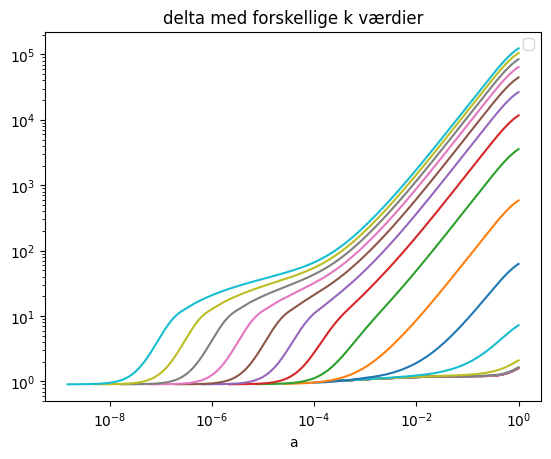

In [5]:

pts = cosmo.get_perturbations()['scalar']
#index_k = 1
#pts0 = pts[index_k]
#print(pts0['a'])
#print(pts0.keys())
#for species in ["cdm"]:# ['ur', 'cdm', 'b', 'g']:
delta_list = np.zeros(len(pts))
for k in range(len(pts)):
    species = "cdm"
    pts0 = pts[k]
    delta = pts0['delta_' + species]
    delta_list[k] = delta[-1]
    plt.loglog(pts0['a'], -delta)#, label="k=%s"%kvec[k])
plt.legend()
plt.title("delta med forskellige k værdier")#f'k = {kvec[index_k]} 1/Mpc')
plt.xlabel("a")

[2.55076093e+00 2.55075754e+00 2.55075878e+00 2.55076630e+00
 2.55088967e+00 2.55190048e+00 2.56335284e+00 2.69447477e+00
 4.40026204e+00 5.20681546e+01 3.93219287e+03 3.43023660e+05
 1.27155996e+07 1.36531021e+08 7.07405100e+08 1.99042201e+09
 4.13849334e+09 7.17659463e+09 1.10744607e+10 1.54105644e+10]


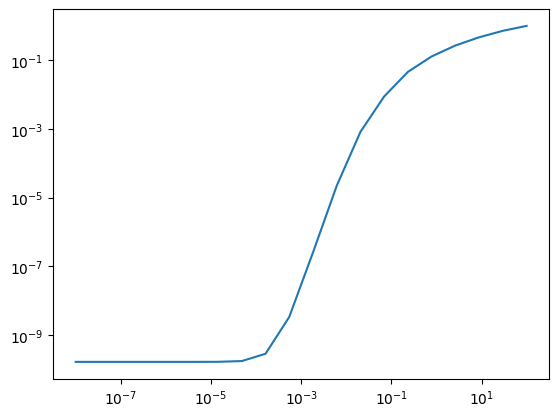

In [6]:
print(delta_list**2)

plt.loglog(kvec,(delta_list/delta_list[-1])**2)